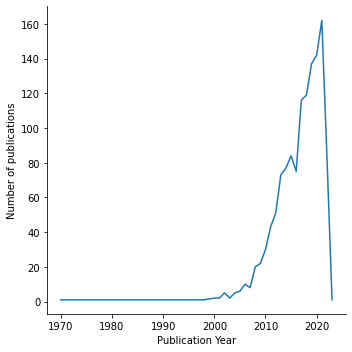

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/hertie_papers.csv')

yps = (df
        .groupby(["publication_year"])["id"]
        .count()
        .to_frame("n_pubs")
        .reset_index()
      )
ax = sns.relplot(
  data=yps, kind="line", 
  x="publication_year", y="n_pubs"
)
ax.set(xlabel="Publication Year", ylabel="Number of publications")
plt.savefig("plots/pubs_time_sns.png")

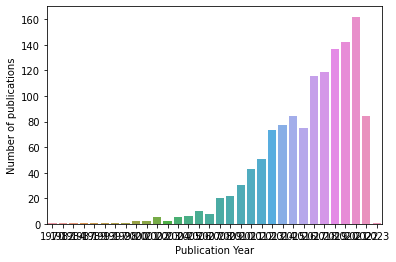

In [5]:
df = pd.read_csv("data/hertie_papers.csv")
yps = (df
        .groupby(["publication_year"])["id"]
        .count()
        .to_frame("n_pubs")
        .reset_index()
      )
ax = sns.barplot(data=yps, x="publication_year", y="n_pubs")
ax.set(xlabel="Publication Year", ylabel="Number of publications")
plt.savefig("plots/pubs_time_bar_sns.png")

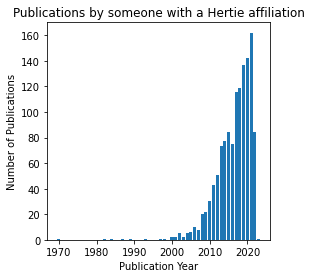

In [6]:
df = pd.read_csv("data/hertie_papers.csv")
yps = (df
        .groupby(["publication_year"])["id"]
        .count()
        .to_frame("n_pubs")
        .reset_index()
      )
fig, ax = plt.subplots(figsize=(4,4))
ax.bar(yps["publication_year"], yps["n_pubs"])
ax.set_xlabel("Publication Year")
ax.set_ylabel("Number of Publications")
ax.set_title("Publications by someone with a Hertie affiliation")
plt.savefig("plots/pubs_time_bar_mpl.png")

TypeError: set_ticks() got an unexpected keyword argument 'labels'

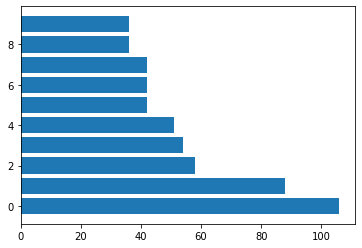

In [34]:
import numpy as np

df = pd.read_csv("data/hertie_authors.csv")
l = df['author_display_name'].value_counts().head(10)

fig, ax = plt.subplots()

# Example data
people = list(l.index)
y_pos = np.arange(len(people))
number_paper = list(l)


ax.barh(y_pos,number_paper, align='center')
ax.set_yticks(y_pos, labels = people) #labels = people
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of paper')
ax.set_title('Titel')

plt.show()


In [42]:
from matplotlib.pyplot import bar


x = df.groupby('author_display_name')['id'].count().head().to_frame('n').reset_index()

<BarContainer object of 5 artists>

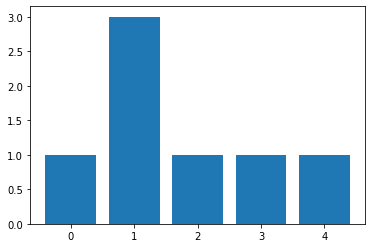

In [46]:
fig, ax = plt.subplots()
ax.bar(x.index, x['n'])

In [49]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

df = pd.read_csv('data/hertie_papers.csv')
vectorizer = CountVectorizer(stop_words="english")
df = df[pd.notna(df["abstract"])].reset_index(drop=True)
dfm = vectorizer.fit_transform(df["abstract"])
dfm

<1115x15084 sparse matrix of type '<class 'numpy.int64'>'
	with 78193 stored elements in Compressed Sparse Row format>

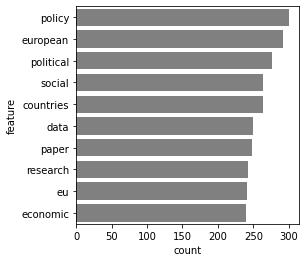

In [50]:
counts = dfm.sum(axis=0).A1
tidy_dfm = pd.DataFrame({
    "count": counts, 
    "feature": vectorizer.get_feature_names_out()
}).sort_values("count",ascending=False).reset_index(drop=True)
fig, ax = plt.subplots(figsize=(4,4))
sns.barplot(
  data=tidy_dfm.head(10), 
  x="count", y="feature", color="grey"
)
plt.savefig("plots/top_terms_sns.png", bbox_inches="tight")

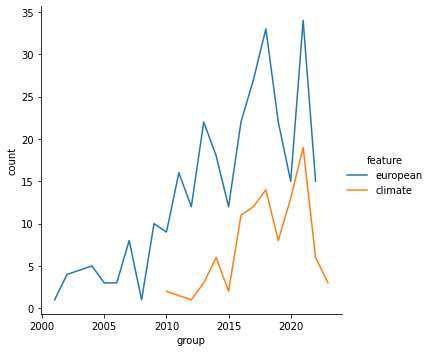

In [51]:
tidy_dfm = pd.DataFrame()
features = vectorizer.get_feature_names_out()
for name, group in df.groupby("publication_year"):
    counts = dfm[group.index,:].sum(axis=0).A1
    group_df = pd.DataFrame({
        "count": counts,
        "feature": features,
        "group": name
    })
    tidy_dfm = pd.concat([
      tidy_dfm, 
      group_df[group_df["count"]!=0]
    ]).reset_index(drop=True)
interesting_features = tidy_dfm[
  tidy_dfm["feature"].isin(["climate","european"])
]
sns.relplot(
  data=interesting_features, x="group", y="count", 
  hue="feature", kind="line"
)
plt.savefig("plots/top_terms_time_sns.png")

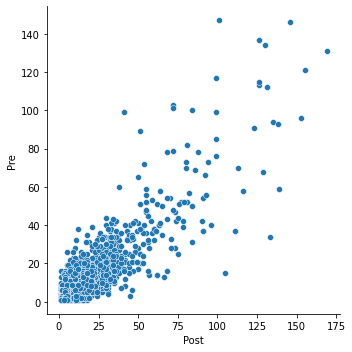

In [52]:
import numpy as np
df["era"] = np.where(df["publication_year"]<2017, "Pre", "Post")
tidy_dfm = pd.DataFrame()
features = vectorizer.get_feature_names_out()
for name, group in df.groupby("era"):
    counts = dfm[group.index,:].sum(axis=0).A1
    group_df = pd.DataFrame({
        "count": counts,
        "feature": features,
        "group": name
    })
    tidy_dfm = pd.concat([
      tidy_dfm, 
      group_df[group_df["count"]!=0]
    ]).reset_index(drop=True)
wide_dfm = tidy_dfm.pivot_table(
  index="feature", columns="group", values="count"
).reset_index().reset_index(drop=True)
sns.relplot(data=wide_dfm, x="Post", y="Pre")
plt.savefig("plots/scattertext_sns.png")